# 1) Percentile

WE USE PERCENTILE WHEN WE DON'T HAVE IDEA ABOUT THE DATA

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.shape

(13200, 7)

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Explore samples that are above 99.90% percentile and below 1% percentile rank

In [4]:
min_thresold , max_thresold = df['price_per_sqft'].quantile([0.001, 0.999])
min_thresold,max_thresold

(1366.184, 50959.36200000098)

In [5]:
df[df.price_per_sqft < 1000]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
5343,other,9 BHK,42000.0,8.0,175.0,9,416
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
12355,other,4 BHK,16335.0,4.0,149.0,4,912


In [6]:
df[df.price_per_sqft > max_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


## Remove outliers

In [7]:
df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
df2.shape

(13172, 7)

In [8]:
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4892,Hebbal,3 BHK,1636.0,3.0,119.0,3,7273
6791,other,2 Bedroom,2400.0,2.0,135.0,2,5625
723,Kaval Byrasandra,2 BHK,1020.0,2.0,52.0,2,5098
12560,other,3 BHK,1500.0,3.0,90.0,3,6000
9820,Jigani,3 BHK,1221.0,3.0,65.0,3,5323
11217,Kogilu,10 Bedroom,3280.0,9.0,450.0,10,13719
10565,Battarahalli,3 BHK,2082.0,3.0,104.0,3,4995
2192,Bellandur,3 BHK,2039.0,3.0,168.0,3,8239
11205,Sarjapur Road,4 BHK,2425.0,5.0,175.0,4,7216
8338,Attibele,2 BHK,656.0,2.0,25.0,2,3810


SOME OF THE DATA POINTS CAN BE VALID BUT IF WE KEEP THEM , OUR PERFORMENCE GOING TO GET HURT

In [9]:
df1=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
import seaborn as sns
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/devfedora/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

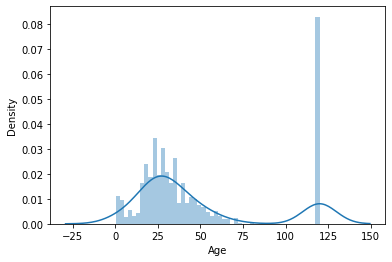

In [10]:
sns.distplot(df1['Age'].fillna(120),bins=50) ## Now this 120 age becomes outliers 


### 2) Box plot

<AxesSubplot:>

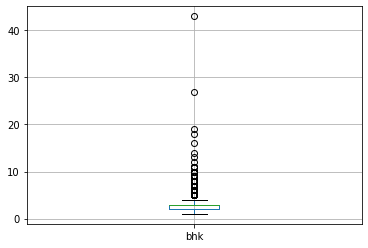

In [20]:
import matplotlib.pyplot as plt
dfb=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv')

dfb.boxplot('bhk')

### 3) 3rd Standard deviation 

In [21]:
upper_limit=dfb.bhk.mean()+3*dfb.bhk.std()
upper_limit

6.679363597150935

In [22]:
lower_limit=dfb.bhk.mean()-3*dfb.bhk.std()
lower_limit

-1.0776969304842692

### 4) z-score

In [23]:
dfb['z-score']=(dfb['bhk']-dfb.bhk.mean())/dfb.bhk.std()
dfb

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.619436
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.927542
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,0.154053
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.154053
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.619436
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,1.701031
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.927542
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.619436
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.927542


In [26]:
dfb[dfb['z-score']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
1697,other,27 BHK,8000.0,27.0,230.0,27,2875,18.717786
3340,other,19 BHK,2000.0,16.0,490.0,19,24500,12.529875
3568,other,16 BHK,10000.0,16.0,550.0,16,5500,10.209409
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500,31.093608
11448,other,18 Bedroom,1200.0,18.0,200.0,18,16666,11.756386


In [37]:
dfb[dfb['z-score']<-1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500,-1.392925
24,Thanisandra,1 RK,510.0,1.0,25.25,1,4950,-1.392925
42,other,1 BHK,600.0,1.0,38.00,1,6333,-1.392925
43,Yelahanka,1 Bedroom,660.0,1.0,48.00,1,7272,-1.392925
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444,-1.392925
...,...,...,...,...,...,...,...,...
13138,Whitefield,1 BHK,877.0,1.0,59.00,1,6727,-1.392925
13153,Raja Rajeshwari Nagar,1 BHK,510.0,1.0,22.00,1,4313,-1.392925
13171,other,1 Bedroom,812.0,1.0,26.00,1,3201,-1.392925
13185,Hulimavu,1 BHK,500.0,1.0,220.00,1,44000,-1.392925
